In [74]:
import pandas as pd
from datetime import timedelta
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

df_goog = pd.read_csv('~/DSI-course-materials/curriculum/04-lessons/week-09/instructor-contributions/SF/1.3-intro_to_time_series_data/assets/datasets/goog.csv')

Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

In [35]:
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995
1,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976
2,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998
3,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983
4,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000


Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

In [36]:
print(df_goog.dtypes)

print(df_goog.isnull().any())

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object
Date         False
Open         False
High         False
Low          False
Close        False
Volume       False
Adj Close    False
dtype: bool


Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [75]:
google_dataframe = df_goog.copy()
google_dataframe.loc[:, "Date"] = pd.to_datetime(google_dataframe["Date"])
google_dataframe["quarter"] = google_dataframe["Date"].apply(lambda x: int(x.month/4) + 1)

google_dataframe.index = google_dataframe["Date"].values
google_dataframe.drop("Date", axis = 1, inplace = True)
google_dataframe.sort_index(inplace = True)
# df_goog["month"] = df_goog["Date"].apply(lambda x: x.month)
# df_goog["year"] = df_goog["Date"].apply(lambda x: x.year)
# df_goog["day"] = df_goog["Date"].apply(lambda x: x.day)

We need to convert the string to a DateTime object. Pandas has a built in function for this! Easy peasy. We should also ensure that the dates are sorted.

In [61]:
# df_goog.index = df_goog["Date"].values
# df_goog.drop("Date", axis = 1, inplace = True)
# df_goog.sort_index(inplace = True)

Let's add some more columns with useful data extracted from the DateTime index.

Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

In [82]:
google_dataframe["Closed higher"] = google_dataframe["Close"] > google_dataframe["Open"]

We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2015, we would do as such:

In [84]:
google_dataframe[google_dataframe.index.year == 2015]

,Open,High,Low,Close,Volume,Adj Close,quarter,Closed higher
2015-01-02,529.012390,542.172424,487.562195,534.522461,2791200,534.522461,1,True
2015-02-02,531.732361,564.712585,518.552307,558.402588,1841600,558.402588,1,True
2015-03-02,560.532532,577.912598,544.222473,548.002441,1828900,548.002441,1,False
2015-04-01,548.602417,571.142578,521.012390,537.340027,2116700,537.340027,2,False
2015-05-01,538.429993,544.190002,521.085022,532.109985,1723100,532.109985,2,False
2015-06-01,536.789978,543.739990,520.500000,520.510010,1662400,520.510010,2,False
2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,2,True
2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,3,False
2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,3,True
2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,3,True


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

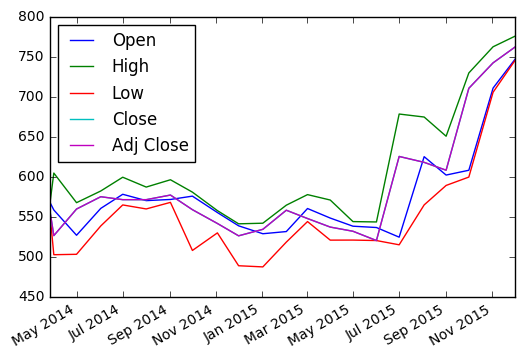

In [91]:
google_dataframe.drop(["Volume", "quarter", "Closed higher"], axis = 1).plot()

On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

## Discussion: Date ranges and Frequencies

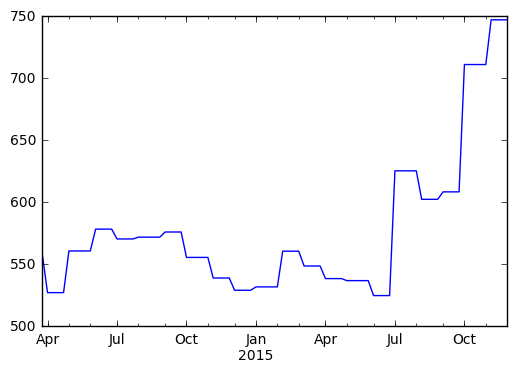

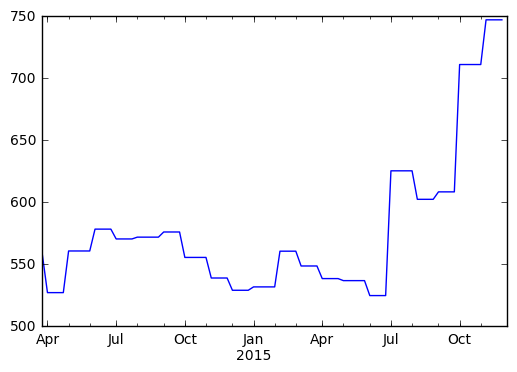

In [131]:
google_dataframe.asfreq(freq = "W", method = "backfill")["Open"].plot()
plt.show()

google_dataframe.resample(rule = "W").backfill()["Open"].plot()
plt.show()


Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
- What does `resample` do?
- What is the difference?
- When would we want to use each?

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.